## FIRE Monte Carlo Simulation 

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create some parameters for the F.I.R.E portfolio 
initial_portfolio_value = 1_000_000
withdrawl_rate = 0.04 # Split withdrawl rate per year (e.g. 4%)
annual_spending = initial_portfolio_value * withdrawl_rate  # Amount withdrawn from the portfolio
years = 30
simulations = 1000

In [3]:
# Create the asset allocation and assumptions
# Defining how the portfolio is split among different asset classes
weights = {
    'stocks' : 0.5,  # 60% of the portfolio is invested in stocks
    'bonds' : 0.3, # 30% of the portfolio is invested in bonds
    'cash' : 0.1  # 10% of the portfolio is invested in cash
}

# Define the expected average annual return for asset class
returns = {
    'stocks' : 0.08,  # 8% expected return on stocks
    'bonds' : 0.03, # 3% expected return on bonds
    'cash' : 0.01  # 1% expected return on cash
}

# Define the annual volatility (standard deviation) for each asset class
volatility = {
    'stocks' : 0.15,  # 15% volatility on stocks
    'bonds' : 0.05, # 5% volatility on bonds
    'cash' : 0.05  # 1% volatility on cash    
}

In [6]:
# Monte Carlo simulation
def simulate_fire():
    all_simulations = []  # List to store the portfolio value history for each simulation
    for _ in range(simulations):  # Repeat the simulation 'simulation' times
        balance = initial_portfolio_value # Initialize the portfolio value
        portfolio_history = [] # List to store the portfolio value history

        for _ in range(years):  # Simulate each year of retirement
            annual_return = 0  # Initializing the annual return for this year

            # Calculate the weighted return based on each asset's random performance
            for asset in weights:
                asset_return = np.random.normal(returns[asset], volatility[asset])  # Simulate the asset return using normal distribution
                annual_return += weights[asset] * asset_return  # Add weighted return to the total annual return

            # Update the portfolio value after applying the return and subtracting spending
            balance = balance * (1 + annual_return) - annual_spending
            portfolio_history.append(balance)  # Record the portfolio value for this year

            if balance <= 0:
                break

        all_simulations.append(portfolio_history)  # Record the portfolio value history for this simulation
    return all_simulations

In [7]:
# Run the simulation and score the results
simulated_paths = simulate_fire()

In [10]:
# Calculate the success rate

# Initialize a counter for successful simulations
successful_count = 0

# Loop through each simulated path
for path in simulated_paths:
    # Check if the simulation lasted all retirement years and ended with money left
    if len(path) == years and path[-1] > 0:
        successful_count += 1

# Calculate the success rate as a percentage
success_rate = (successful_count / len(simulated_paths))

# Print the success rate
print(f'Success rate: {success_rate:.2%} of simulations lasted {years} years.')

Success rate: 98.40% of simulations lasted 30 years.


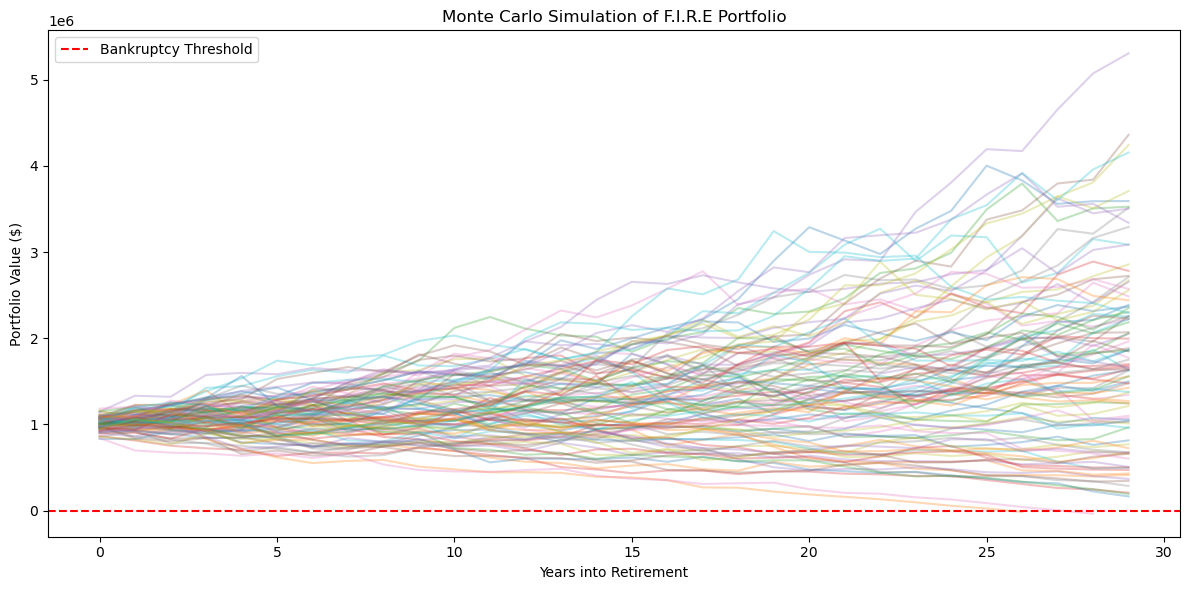

In [13]:
# Visualize the data
plt.figure(figsize=(12,6))

# Plot 100 simulated paths
for path in simulated_paths[:100]:
    plt.plot(path, alpha=0.3)

# Drawing a line at zero to indicate bankruptcy
plt.axhline(0, color='red', linestyle='--', label = 'Bankruptcy Threshold')

# Add the title and axis labels
plt.title("Monte Carlo Simulation of F.I.R.E Portfolio")
plt.xlabel("Years into Retirement")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()